 ## Análise Exploratória Campanha de Marketing (A/B Test)

 ## Contexto do Problema

 Uma empresa realizou um experimento A/B para avaliar o impacto de um anúncio digital.

 - Grupo "ad": usuários expostos ao anúncio.
 - Grupo "psa": usuários que não visualizaram o anúncio (grupo controle).

 O objetivo desta etapa é realizar a análise exploratória dos dados (EDA),
 entendendo a estrutura do dataset, verificando qualidade dos dados e
 observando diferenças iniciais entre os grupos.

 A validação estatística da diferença será realizada no próximo notebook.

## 1. Carregando os Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/marketing_AB.csv')

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## 2. Visão Geral do Dataset

In [4]:
df.shape

(588101, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

## 3. Distribuição dos Grupos

In [7]:
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

## 4. Taxa de Conversão Geral

In [8]:
df['converted'].mean()

np.float64(0.02523886203220195)

 ## 5. Taxa de Conversão por Grupo

In [9]:
summary = df.groupby('test group')['converted'].agg(['count', 'sum', 'mean'])
summary

,count,sum,mean
test group,,,
ad,564577,14423,0.025547
psa,23524,420,0.017854


In [10]:
summary['conversion_%'] = summary['mean'] * 100
summary

,count,sum,mean,conversion_%
test group,,,,
ad,564577,14423,0.025547,2.554656
psa,23524,420,0.017854,1.785411


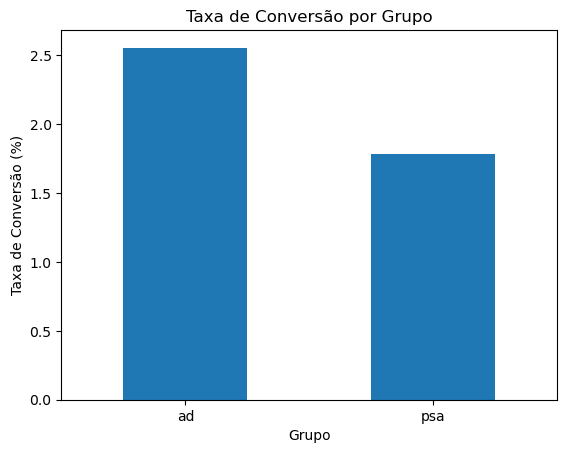

In [11]:
conversion_rate = summary['conversion_%']

conversion_rate.plot(kind='bar')

plt.title('Taxa de Conversão por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Taxa de Conversão (%)')
plt.xticks(rotation=0)
plt.show()

## Diferença Entre Grupos

In [12]:
p_ad = summary.loc['ad', 'mean']
p_psa = summary.loc['psa', 'mean']

absolute_diff = p_ad - p_psa
relative_diff = absolute_diff / p_psa

absolute_diff, relative_diff

(np.float64(0.007692453192201517), np.float64(0.43085064022225833))

## Verificando Condições para Teste de Proporções

In [13]:
summary['n*p'] = summary['count'] * summary['mean']
summary['n*(1-p)'] = summary['count'] * (1 - summary['mean'])

summary

,count,sum,mean,conversion_%,n*p,n*(1-p)
test group,,,,,,
ad,564577,14423,0.025547,2.554656,14423.0,550154.0
psa,23524,420,0.017854,1.785411,420.0,23104.0


## 6. Outras Variáveis Relevantes

In [14]:
df.groupby('test group')['total ads'].describe()

,count,mean,std,min,25%,50%,75%,max
test group,,,,,,,,
ad,564577.0,24.823365,43.750456,1.0,4.0,13.0,27.0,2065.0
psa,23524.0,24.761138,42.860720,1.0,4.0,12.0,26.0,907.0


In [15]:
df.groupby(['test group', 'most ads day'])['converted'].mean()

test group  most ads day
ad          Friday          0.022465
            Monday          0.033241
            Saturday        0.021307
            Sunday          0.024620
            Thursday        0.021637
            Tuesday         0.030440
            Wednesday       0.025356
psa         Friday          0.016303
            Monday          0.022559
            Saturday        0.013996
            Sunday          0.020595
            Thursday        0.020230
            Tuesday         0.014448
            Wednesday       0.015759
Name: converted, dtype: float64

## Conclusão da Análise Exploratória

- O grupo exposto ao anúncio apresenta maior taxa de conversão.
- A diferença absoluta é pequena (~0,77 ponto percentual).
- Proporcionalmente, representa aumento relevante (~43%).
- Ambos os grupos possuem tamanho amostral muito grande.
- As condições para aplicação de teste Z para proporções são atendidas.

Nesta etapa observamos diferença entre os grupos, mas ainda não podemos concluir causalidade.

No próximo notebook será realizado teste de hipótese para verificar
se a diferença observada é estatisticamente significativa.